# Kaggle: Expected House Sale Price 

## Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

## Load dataset

In [2]:
# load data: train data as train, test data as test
train = pd.read_csv("./data/train.csv")
test = pd.read_csv ("./data/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Column information

"""

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

"""

"\n\nSalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.\nMSSubClass: The building class\nMSZoning: The general zoning classification\nLotFrontage: Linear feet of street connected to property\nLotArea: Lot size in square feet\nStreet: Type of road access\nAlley: Type of alley access\nLotShape: General shape of property\nLandContour: Flatness of the property\nUtilities: Type of utilities available\nLotConfig: Lot configuration\nLandSlope: Slope of property\nNeighborhood: Physical locations within Ames city limits\nCondition1: Proximity to main road or railroad\nCondition2: Proximity to main road or railroad (if a second is present)\nBldgType: Type of dwelling\nHouseStyle: Style of dwelling\nOverallQual: Overall material and finish quality\nOverallCond: Overall condition rating\nYearBuilt: Original construction date\nYearRemodAdd: Remodel date\nRoofStyle: Type of roof\nRoofMatl: Roof material\nExterior1st: Exterior covering on hous

## Pre-processing 

In [6]:
# info로 체크해본 결과 확인해야 할 column들 : NaN값이 너무 많은 경우

'''

Alley            91 non-null object,  Type of alley access
FireplaceQu      770 non-null object, Fireplace quality
PoolQC           7 non-null object, Pool quality
Fence            281 non-null object, Fence quality
MiscFeature      54 non-null object

'''

'\n\nAlley            91 non-null object,  Type of alley access\nFireplaceQu      770 non-null object, Fireplace quality\nPoolQC           7 non-null object, Pool quality\nFence            281 non-null object, Fence quality\nMiscFeature      54 non-null object\n\n'

### Alley

In [7]:
# Alley: Type of alley access

In [8]:
train.groupby("Alley").size()

Alley
Grvl    50
Pave    41
dtype: int64

In [9]:
train['Alley'] = train['Alley'].fillna("NA")

In [10]:
train.groupby("Alley").size()

Alley
Grvl      50
NA      1369
Pave      41
dtype: int64

### FireplaceQu

In [11]:
train.groupby('FireplaceQu').size()

FireplaceQu
Ex     24
Fa     33
Gd    380
Po     20
TA    313
dtype: int64

In [12]:
train['FireplaceQu'] = train['FireplaceQu'].fillna("NA")

In [13]:
train.groupby('FireplaceQu').size()

FireplaceQu
Ex     24
Fa     33
Gd    380
NA    690
Po     20
TA    313
dtype: int64

In [14]:
train['FireplaceQu'].count()

1460

### PoolQC

In [15]:
train["PoolQC"].unique()

# data description을 참조하여 NaN 값은 No pool 이라는 뜻의 NA로 바꿔준다.

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [16]:
train['PoolQC'] = train['PoolQC'].fillna("NA")

In [17]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
train.groupby('PoolQC').size()

PoolQC
Ex       2
Fa       2
Gd       3
NA    1453
dtype: int64

### Fence

In [19]:
# Fence quality

In [20]:
train.groupby("Fence").size()

Fence
GdPrv     59
GdWo      54
MnPrv    157
MnWw      11
dtype: int64

In [21]:
train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [22]:
train['Fence'].count()

281

In [23]:
train['Fence'] = train['Fence'].fillna("NA")

In [24]:
train['Fence'].unique()

array(['NA', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [25]:
train['Fence'].count()

1460

### MiscFeature

In [26]:
# Miscellaneous feature not covered in other categories

In [27]:
train.groupby('MiscFeature').size()

MiscFeature
Gar2     2
Othr     2
Shed    49
TenC     1
dtype: int64

In [28]:
train['MiscFeature'].count()

54

In [29]:
train['MiscFeature'] = train['MiscFeature'].fillna('NA')

In [30]:
train.groupby("MiscFeature").size()

MiscFeature
Gar2       2
NA      1406
Othr       2
Shed      49
TenC       1
dtype: int64

In [31]:
train["MiscFeature"].count()

1460

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

## Analysis 

### Finding a correlation between columns and sales price

In [33]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [34]:
# SalePrice와의 각 변수의 상관관계 구하기 : corrwith 한 변수와 전체 데이터 column의 상관관계 한꺼번에 보여주기
train.corrwith(train["SalePrice"])

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
dtype: float

In [35]:
# For 문을 만들어서 상관계수가 높은 변수만 자동으로 찾아내기: corr

## 각 column 명을 차례대로 넣어주기 위해서 train_column이라는 이름으로 column명들을 저장하기
train_columns = train.columns

In [36]:
train_columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [37]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [38]:
## correlation의 절대값이 0.3 이상인 경우, 컬럼명과 correlation값을 구한다

a = []

for i in train_columns :
    try :
        corr = train[i].corr(train['SalePrice'])
        if abs(corr) > 0.3 :
            a.append((i, corr))
    except : 
        pass

In [39]:
a

[('LotFrontage', 0.35179909657067804),
 ('OverallQual', 0.7909816005838047),
 ('YearBuilt', 0.5228973328794969),
 ('YearRemodAdd', 0.5071009671113865),
 ('MasVnrArea', 0.47749304709571594),
 ('BsmtFinSF1', 0.38641980624215316),
 ('TotalBsmtSF', 0.6135805515591954),
 ('1stFlrSF', 0.6058521846919148),
 ('2ndFlrSF', 0.31933380283206764),
 ('GrLivArea', 0.7086244776126522),
 ('FullBath', 0.5606637627484456),
 ('TotRmsAbvGrd', 0.5337231555820284),
 ('Fireplaces', 0.4669288367515277),
 ('GarageYrBlt', 0.48636167748786074),
 ('GarageCars', 0.6404091972583531),
 ('GarageArea', 0.6234314389183617),
 ('WoodDeckSF', 0.3244134445681295),
 ('OpenPorchSF', 0.31585622711605543),
 ('SalePrice', 1.0)]

In [40]:
sorted(a, key = lambda x:(x[1]), reverse = True)

[('SalePrice', 1.0),
 ('OverallQual', 0.7909816005838047),
 ('GrLivArea', 0.7086244776126522),
 ('GarageCars', 0.6404091972583531),
 ('GarageArea', 0.6234314389183617),
 ('TotalBsmtSF', 0.6135805515591954),
 ('1stFlrSF', 0.6058521846919148),
 ('FullBath', 0.5606637627484456),
 ('TotRmsAbvGrd', 0.5337231555820284),
 ('YearBuilt', 0.5228973328794969),
 ('YearRemodAdd', 0.5071009671113865),
 ('GarageYrBlt', 0.48636167748786074),
 ('MasVnrArea', 0.47749304709571594),
 ('Fireplaces', 0.4669288367515277),
 ('BsmtFinSF1', 0.38641980624215316),
 ('LotFrontage', 0.35179909657067804),
 ('WoodDeckSF', 0.3244134445681295),
 ('2ndFlrSF', 0.31933380283206764),
 ('OpenPorchSF', 0.31585622711605543)]

In [41]:
### dictionary로 column명과 correlation 받은 경우, 이것을 tuple로 바꿔서 sorting 하기

b = []

for i in train_columns :
    try :
        corr = train[i].corr(train['SalePrice'])
        if abs(corr) > 0.3 :
            b.append({i: corr})
    except : 
        pass

In [42]:
b

[{'LotFrontage': 0.35179909657067804},
 {'OverallQual': 0.7909816005838047},
 {'YearBuilt': 0.5228973328794969},
 {'YearRemodAdd': 0.5071009671113865},
 {'MasVnrArea': 0.47749304709571594},
 {'BsmtFinSF1': 0.38641980624215316},
 {'TotalBsmtSF': 0.6135805515591954},
 {'1stFlrSF': 0.6058521846919148},
 {'2ndFlrSF': 0.31933380283206764},
 {'GrLivArea': 0.7086244776126522},
 {'FullBath': 0.5606637627484456},
 {'TotRmsAbvGrd': 0.5337231555820284},
 {'Fireplaces': 0.4669288367515277},
 {'GarageYrBlt': 0.48636167748786074},
 {'GarageCars': 0.6404091972583531},
 {'GarageArea': 0.6234314389183617},
 {'WoodDeckSF': 0.3244134445681295},
 {'OpenPorchSF': 0.31585622711605543},
 {'SalePrice': 1.0}]

In [43]:
len(b)

19

In [44]:
### key와 value값으로 for문돌려서 tuple 집합의 list로 만들기

x = []

for i in range (0,19):
    for k,v in b[i].items() :
        x.append((k,v))

In [45]:
x

[('LotFrontage', 0.35179909657067804),
 ('OverallQual', 0.7909816005838047),
 ('YearBuilt', 0.5228973328794969),
 ('YearRemodAdd', 0.5071009671113865),
 ('MasVnrArea', 0.47749304709571594),
 ('BsmtFinSF1', 0.38641980624215316),
 ('TotalBsmtSF', 0.6135805515591954),
 ('1stFlrSF', 0.6058521846919148),
 ('2ndFlrSF', 0.31933380283206764),
 ('GrLivArea', 0.7086244776126522),
 ('FullBath', 0.5606637627484456),
 ('TotRmsAbvGrd', 0.5337231555820284),
 ('Fireplaces', 0.4669288367515277),
 ('GarageYrBlt', 0.48636167748786074),
 ('GarageCars', 0.6404091972583531),
 ('GarageArea', 0.6234314389183617),
 ('WoodDeckSF', 0.3244134445681295),
 ('OpenPorchSF', 0.31585622711605543),
 ('SalePrice', 1.0)]

In [46]:
corr_sorted = sorted(x, key = lambda x: x[1], reverse = True)

In [47]:
corr_sorted

[('SalePrice', 1.0),
 ('OverallQual', 0.7909816005838047),
 ('GrLivArea', 0.7086244776126522),
 ('GarageCars', 0.6404091972583531),
 ('GarageArea', 0.6234314389183617),
 ('TotalBsmtSF', 0.6135805515591954),
 ('1stFlrSF', 0.6058521846919148),
 ('FullBath', 0.5606637627484456),
 ('TotRmsAbvGrd', 0.5337231555820284),
 ('YearBuilt', 0.5228973328794969),
 ('YearRemodAdd', 0.5071009671113865),
 ('GarageYrBlt', 0.48636167748786074),
 ('MasVnrArea', 0.47749304709571594),
 ('Fireplaces', 0.4669288367515277),
 ('BsmtFinSF1', 0.38641980624215316),
 ('LotFrontage', 0.35179909657067804),
 ('WoodDeckSF', 0.3244134445681295),
 ('2ndFlrSF', 0.31933380283206764),
 ('OpenPorchSF', 0.31585622711605543)]

In [48]:
# 상관정도가 높은 3개 column을 이용하여 새로운 데이터 세트를 만들기

In [49]:
### 상관정도가 높은 3개의 column을 각각 지정해줘서 데이터 프레임 만들기
train_1 = train[[(corr_sorted[1][0]),(corr_sorted[2][0]),(corr_sorted[3][0]),("SalePrice")]].copy()

In [50]:
train_1.head()

,OverallQual,GrLivArea,GarageCars,SalePrice
0,7,1710,2,208500
1,6,1262,2,181500
2,7,1786,2,223500
3,7,1717,3,140000
4,8,2198,3,250000


In [51]:
### for문을 이용해서 상관정도가 높은 3개의 데이터 프레임 만들기
### 새로운 dataframe을 만들기위해 가장 상관정도가 높은 column으로 기본 dataframe을 만들어 놓기

new_df = train[[corr_sorted[1][0]]].copy()

In [52]:
new_df.head()

,OverallQual
0,7
1,6
2,7
3,7
4,8


In [53]:
###  concat을 이용해서 합치기

train_2 = new_df.copy()

for i in range(2, 5) :
    train_2 = pd.concat([train_2, train[[corr_sorted[i][0]]]], axis = 1)

In [54]:
train_2.head()

,OverallQual,GrLivArea,GarageCars,GarageArea
0,7,1710,2,548
1,6,1262,2,460
2,7,1786,2,608
3,7,1717,3,642
4,8,2198,3,836


In [55]:
### 새로운 칼럼을 하나씩 붙이는 형태로 합치기

train_3 = new_df.copy()

for i in range (2, 5) :
    train_3[corr_sorted[i][0]] = train[corr_sorted[i][0]]

train_3.head()

,OverallQual,GrLivArea,GarageCars,GarageArea
0,7,1710,2,548
1,6,1262,2,460
2,7,1786,2,608
3,7,1717,3,642
4,8,2198,3,836


In [56]:
### 이렇게 만들어놓은 새로운 DataFrame에 supervised learning을 위해 y label인 SalePrice를 붙여주기

train[['SalePrice']].head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [57]:
### merge를 이용해서 SalePrice를 붙여주기 (새로운 칼럼 붙이는 형태로 해도 상관없다)

train_2 = pd.merge(train_2, train[['SalePrice']], left_index = True, right_index = True)

In [58]:
train_2.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,1710,2,548,208500
1,6,1262,2,460,181500
2,7,1786,2,608,223500
3,7,1717,3,642,140000
4,8,2198,3,836,250000


In [59]:
train_3['SalePrice'] = train['SalePrice'] 

In [60]:
train_3.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,1710,2,548,208500
1,6,1262,2,460,181500
2,7,1786,2,608,223500
3,7,1717,3,642,140000
4,8,2198,3,836,250000


In [61]:
# 참고: <list>.sort(), sorted(<list>) 의 차이점


# <list>.sort()는 원본 리스트의 순서를 변경한다. 변경된 값을 반환하지 않는다. 새로운 복사본을 만들지 않기 때문에 훨씬 빠르다.
# sorted(<list>)는 정렬된 새로운 리스트를 반환한다. 원본 리스트에 영향 없고, 모든 iterable에 동작한다 (tuple, list, dict)

# Test Data Pre-Processing

In [62]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [63]:
new_test = test[['OverallQual','GrLivArea','GarageCars','GarageArea']]

In [64]:
new_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea
0,5,896,1.0,730.0
1,6,1329,1.0,312.0
2,5,1629,2.0,482.0
3,6,1604,2.0,470.0
4,8,1280,2.0,506.0


# Visualization

In [65]:
## 가장 correlation 이 높은 int/float 값을 가지는 column 3개만 두고 train을 시키면 어떻게 될 것인가?

In [66]:
# 필요한 열 추출하여 X, y 나눠주기
new_train = train_3

X = new_train [['OverallQual','GrLivArea','GarageCars','GarageArea']]
y = new_train [['SalePrice']]

In [67]:
# 학습 전용 데이터와 테스트 전용 데이터로 나누기
train_X, test_X, train_y, test_y = train_test_split (X, y)

### seaborn

seaborn을 이용한 1차원 실수 분포 플롯

* rugplot: 데이터 위치를 x축 위에 작은 선분으로 나타내어 실제 데이터들의 위치를 보여줌
* kdeplot: 커널 밀도는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여줌
* distplot: 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 hist 명령보다 많이 사용
* countplot: 데이터 프레임에만 사용할 수 있음

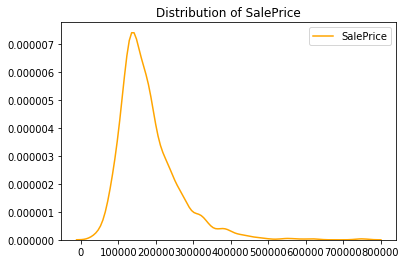

In [68]:
# 대략적인 가격 분포 정도 시각화해보기
sns.kdeplot(new_train['SalePrice'], color = 'orange')
plt.title ("Distribution of SalePrice")
plt.show()

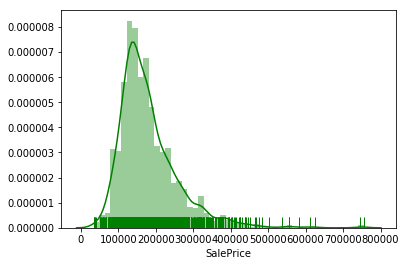

In [69]:
sns.distplot (new_train['SalePrice'], kde = True, rug= True, color = "green")
plt.show()

다차원 데이터 

* 분석하고자 하는 데이터가 모두 실수 값인 경우
* 분석하고자 하는 데이터가 모두 카테고리 값인 경우
* 분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우



### seanborn을 이용한 산점도 행렬

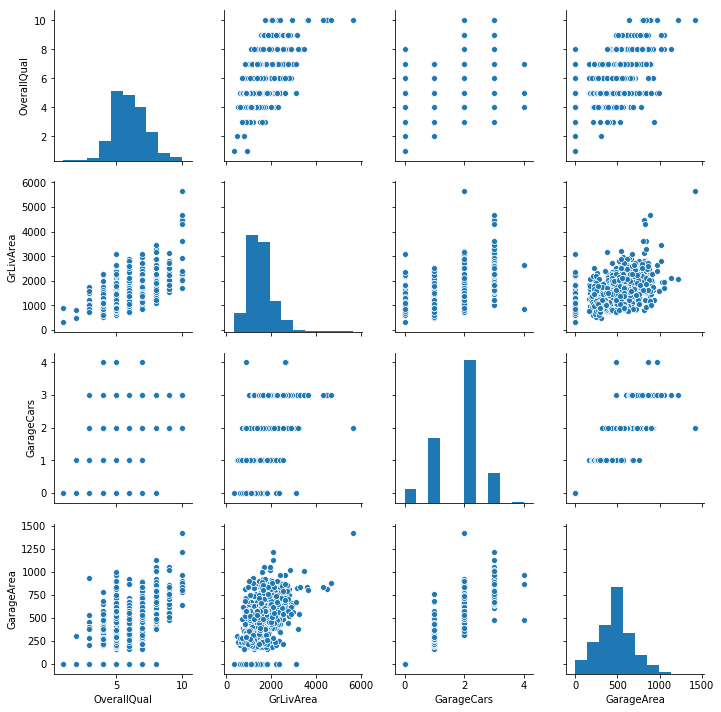

In [71]:
sns.pairplot (train_X, diag_kind = 'hist')
plt.show()

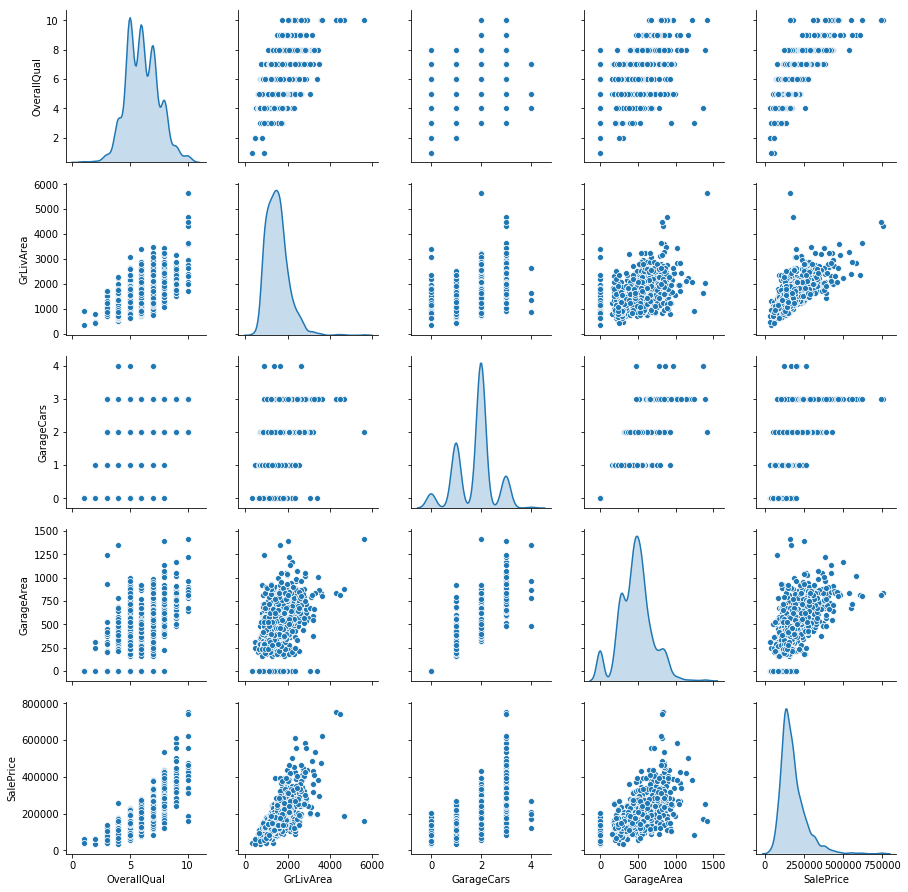

In [72]:
# kde 를 이용해서 각 그룹별 밀도 알아보기
sns.pairplot (new_train,
             diag_kind = "kde",
             palette = 'bright')

plt.show()

# Training

In [73]:
## 더 생각해볼 문제


### int가 아닌 str(object)인 값들과 saleprice의 관계는 어떻게 correlation을 구할 것인가?
### 카테고리형 column과 saleprice의 관계를 visualization해보기
### correlation 높은 기준으로 뽑는다면, 얼마를 높은 기준으로 둘 것인가?